# Pranav Kalambe <h3>Email: pranavkalambe12@gmail.com</h3>

<h1 align='center'><font color='Blue'><b> THE SPARK FOUNDATION </b> </font></h1>

### Data Science And Business Analytics Intern

### TASK 3 - Exploratory Data Analysis - Retail

<h3> Topic - As a business manager, try to find out the weak areas where you can
work to make more profit. </h3>

![image here](business1.png "Logo")

_**Link For the dataset:**<br>&emsp; &emsp;&emsp; &emsp;&emsp;&emsp;_ 
https://bit.ly/3i4rbWl

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv("SampleSuperstore.csv")

In [75]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [76]:
df.shape

(9994, 13)

In [77]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

#### Checking DATA

In [78]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### Postal Code does not have much significance, hence dropping it

In [79]:
df.drop(['Postal Code'],axis = 1, inplace = True)
df

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


### Total Sales

In [80]:
(df['Sales'].values).sum()

2297200.8603

### Total Profit

In [81]:
(df['Profit'].values).sum()

286397.0217

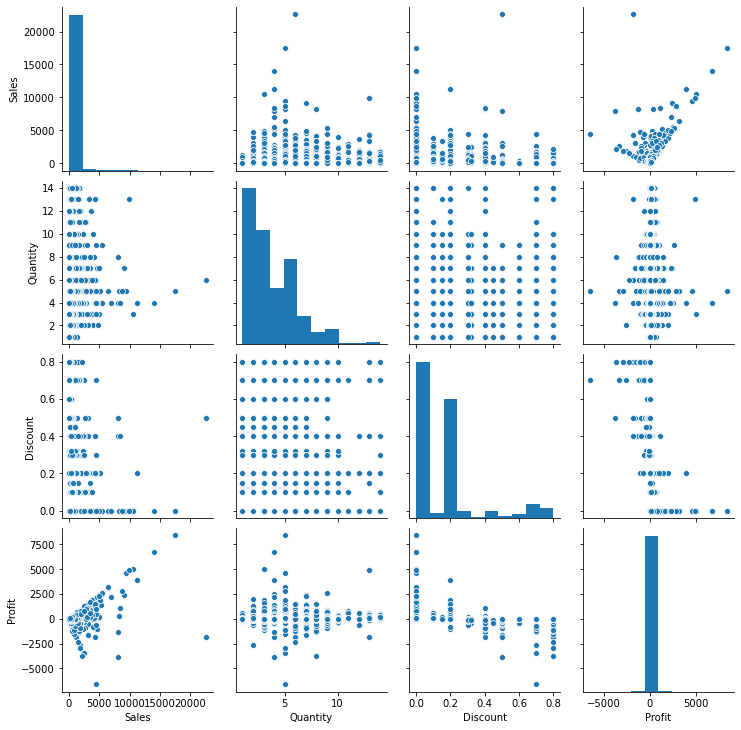

In [82]:
sns.pairplot(df)

### Observing unique values in different columns

In [83]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [84]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [85]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [86]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [87]:
df['Country'].unique()

array(['United States'], dtype=object)

#### Since Country Column has only one unique value it does not have any significance, hence dropping it.

In [88]:
df.drop(['Country'], axis = 1, inplace = True)

In [89]:
df.tail()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,Westminster,California,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [90]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [91]:
len(df['State'].unique()) # There are 49 different States

49

### Looking into sales and profit at different regions

In [92]:
east_sales = ((df.loc[(df['Region']== 'East')])['Sales']).mean()
west_sales = ((df.loc[(df['Region']== 'West')])['Sales']).mean()
south_sales = ((df.loc[(df['Region']== 'South')])['Sales']).mean()
central_sales = ((df.loc[(df['Region']== 'Central')])['Sales']).mean()
h = [east_sales, west_sales, south_sales, central_sales]

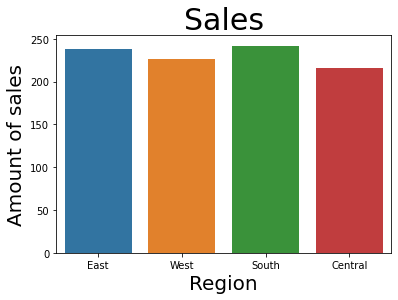

In [93]:
fig = sns.barplot(x = ['East','West','South',"Central"], y = h)
plt.title("Sales",size=30)
plt.xlabel("Region",size=20)
plt.ylabel("Amount of sales",size=20)
plt.show(fig)

In [94]:
east_profit = ((df.loc[(df['Region']== 'East')])['Profit']).mean()
west_profit = ((df.loc[(df['Region']== 'West')])['Profit']).mean()
south_profit = ((df.loc[(df['Region']== 'South')])['Profit']).mean()
central_profit = ((df.loc[(df['Region']== 'Central')])['Profit']).mean()
d = [east_profit, west_profit, south_profit, central_profit]

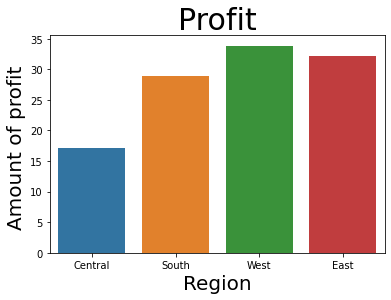

In [118]:
sns.barplot(x=x,y=y )
plt.title("Profit",size=30)
plt.xlabel("Region",size=20)
plt.ylabel("Amount of profit ",size=20)
plt.show(fig)

### Therefore it is clear that profit made in West region is maximum followed by east, south and central

_____

### Biggest Negative transaction is

In [96]:
df.loc[df['Profit']==df['Profit'].min()]

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7772,Standard Class,Consumer,Lancaster,Ohio,East,Technology,Machines,4499.985,5,0.7,-6599.978


### Total Negative Transaction

In [97]:
df.loc[(df['Profit'])<0]

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Corporate,Bryan,Texas,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176
9921,Standard Class,Home Office,Akron,Ohio,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936
9931,Standard Class,Consumer,San Bernardino,California,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960
9937,Second Class,Corporate,Los Angeles,California,West,Furniture,Tables,71.0880,2,0.20,-1.7772


In [98]:
total_loss = (df.loc[(df['Profit'])<0])['Profit'].sum() # total loss
total_loss

-156131.28569999998

In [99]:
df.loc[(df['Discount'] > 0)]

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
7,Standard Class,Consumer,Los Angeles,California,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
10,Standard Class,Consumer,Los Angeles,California,West,Furniture,Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...
9978,Standard Class,Home Office,Los Angeles,California,West,Office Supplies,Binders,13.3760,4,0.20,4.6816
9979,Standard Class,Home Office,Los Angeles,California,West,Office Supplies,Binders,437.4720,14,0.20,153.1152
9981,First Class,Consumer,Fairfield,Ohio,East,Office Supplies,Labels,16.5200,5,0.20,5.3690
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028


In [100]:
max_discount_loss = df.loc[(df['Discount'] == df['Discount'].max()) & (df['Profit']<0)]
df.loc[(df['Discount'] == df['Discount'].max()) & (df['Profit']<0)]

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
14,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Appliances,68.810,5,0.8,-123.8580
15,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Binders,2.544,3,0.8,-3.8160
75,First Class,Corporate,Houston,Texas,Central,Office Supplies,Binders,1.248,3,0.8,-1.9344
101,Standard Class,Home Office,Chicago,Illinois,Central,Office Supplies,Binders,1.788,3,0.8,-3.0396
169,Standard Class,Consumer,San Antonio,Texas,Central,Office Supplies,Appliances,177.980,5,0.8,-453.8490
...,...,...,...,...,...,...,...,...,...,...,...
9794,Second Class,Consumer,Houston,Texas,Central,Office Supplies,Binders,18.240,3,0.8,-31.0080
9795,Standard Class,Corporate,Chicago,Illinois,Central,Office Supplies,Binders,3.798,3,0.8,-5.8869
9808,Standard Class,Consumer,Chicago,Illinois,Central,Office Supplies,Binders,2.112,2,0.8,-3.3792
9835,First Class,Consumer,La Porte,Texas,Central,Office Supplies,Binders,16.392,2,0.8,-26.2272


In [101]:
loss_at_max_discount = max_discount_loss['Profit'].sum() # Loss when discount is maximum
loss_at_max_discount 

-30539.0392

In [102]:
per_loss_at_max_discount = (loss_at_max_discount/total_loss)*100
per_loss_at_max_discount

19.55984610200389

In [103]:
x = df['Profit']
y = df['Discount']*100

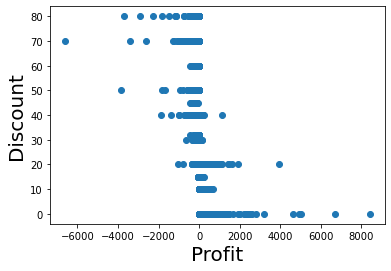

In [104]:
plt.scatter(x,y)
plt.xlabel('Profit',size = 20)
plt.ylabel('Discount',size = 20)
plt.show()

#### Overall we can conclude that as the discount increase profit is decreasing hence to improve companies performance dicount should be reduce on 

In [105]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [106]:
tech_len = len(df.loc[(df['Category'] == 'Technology') & (df['Profit'] > 0)])
tech_postive_profit = (df.loc[(df['Category'] == 'Technology') & (df['Profit'] > 0)])['Profit'].sum()
print(f"Postive profit earn by the items under the category of TECHNOLOGY is {tech_postive_profit} by {tech_len} no. of items")

Postive profit earn by the items under the category of TECHNOLOGY is 184034.8663 by 1573 no. of items


In [107]:
furniture_len = len(df.loc[(df['Category'] == 'Furniture') & (df['Profit'] > 0)])
fur_postive_profit = (df.loc[(df['Category'] == 'Furniture') & (df['Profit'] > 0)])['Profit'].sum()
print(f"Postive profit earn by the items under the category of FURNITURE is {fur_postive_profit} by {furniture_len} no. of items")

Postive profit earn by the items under the category of FURNITURE is 79387.3818 by 1374 no. of items


In [108]:
office_len = len(df.loc[(df['Category'] == 'Office Supplies') & (df['Profit'] > 0)])
office_positive_profit = (df.loc[(df['Category'] == 'Office Supplies') & (df['Profit'] > 0)])['Profit'].sum()
print(f"Postive profit earn by the items under the category of OFFICE SUPPLIES is {office_positive_profit:.2f} by {office_len} no. of items")

Postive profit earn by the items under the category of OFFICE SUPPLIES is 179106.06 by 5111 no. of items


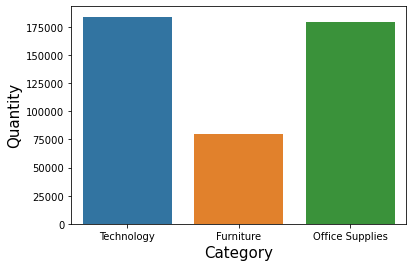

In [120]:
category_profit = [tech_postive_profit,fur_postive_profit,office_positive_profit]
category_sales = [tech_len,furniture_len,office_len]
sns.barplot(['Technology','Furniture','Office Supplies'],category_profit)
plt.xlabel("Category",size=15)
plt.ylabel("Quantity",size=15)
plt.show()

## To Increase Sales

<ul>
<li>Central region has least profit so company should concentrate more there
<li>Discount should be reduced made nearly equal to 0.0
<li>Technology and office supplies are in high demand so company should invest big in it 
</ul>